In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o csv 'concerta_2024-09-19.csv'
data = pd.read_csv('Data/concerta_2024-09-19.csv')
print("Valores iniciais: " + str(data.shape))

data.head(1)


Valores iniciais: (429949, 11)


,time,ad_displayed,emotion,engaged,face_x1y1x2y2_coordinates,gender,person,race,source,age,head_position
0,2024-09-19 14:59:59.516000+00:00,young_male,neutral,yes,"(698, 804, 788, 934)",female,3364,white,1,15,"(5.903427, 0.48050785, 11.568752)"


In [3]:
# Adicionar coluna da hora para depois remover as horas que não são necessárias analisar
data['time'] = pd.to_datetime(data['time'], format='mixed')
data['hour'] = data['time'].dt.hour

#Remover dados antes das 9:00 e após as 12:00
data = data.drop(data.loc[(data['hour']<9) | (data['hour']>11)].index)
print("Dados atualizados: " + str(data.shape))
print(data['hour'].head(1))
print(data['hour'].tail(1))

Dados atualizados: (180078, 12)
135476    11
Name: hour, dtype: int32
315553    9
Name: hour, dtype: int32


In [4]:
# Função para calcular o Engagement
def looking_by_head_pose(pose):
    if (pose[1] > -35) & (pose[1] < 35) & (pose[2] > -35) & (pose[2] < 35) :
        return "yes"
    else:
        return "no"
   
data['engaged'] = data['head_position'].apply(lambda x: looking_by_head_pose(eval(x)))
teste = list(data['engaged'].value_counts())
print(teste)
percentagem = (teste[0] / (teste[1] + teste[0])) * 100
print(percentagem)


[150242, 29836]
83.43162407401236


In [5]:
# Verificar missing values
print(data.isna().sum())

time                         0
ad_displayed                 0
emotion                      0
engaged                      0
face_x1y1x2y2_coordinates    0
gender                       0
person                       0
race                         0
source                       0
age                          0
head_position                0
hour                         0
dtype: int64


## Distribuição do Engagement

engaged
yes    150242
no      29836
Name: count, dtype: int64


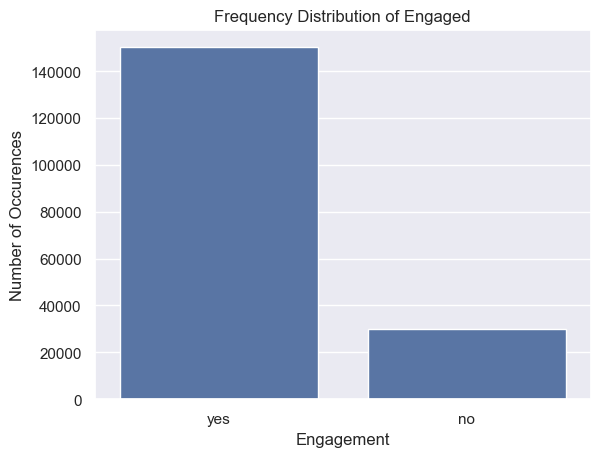

In [6]:
# Distribuição das emoções
emotions_count = data['engaged'].value_counts()
print(emotions_count)
sns.set(style="darkgrid")
sns.barplot(x=emotions_count.index, y=emotions_count.values)
plt.title('Frequency Distribution of Engaged')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Engagement', fontsize=12)
plt.show()

## Distribuição das Emoções

emotion
neutral     132646
sad          20508
surprise     10560
anger         7851
unknown       4788
happy         3725
Name: count, dtype: int64


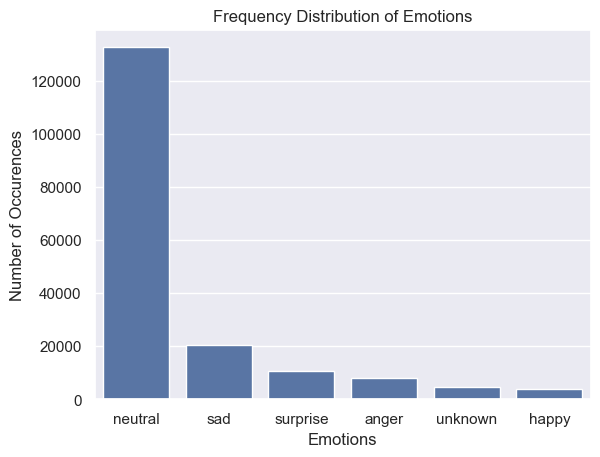

In [58]:
# Distribuição das emoções
emotions_count = data['emotion'].value_counts()
print(emotions_count)
sns.set(style="darkgrid")
sns.barplot(x=emotions_count.index, y=emotions_count.values)
plt.title('Frequency Distribution of Emotions')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()


## Distribuição das emoções quando "engaged"

emotion
neutral     132646
sad          20508
surprise     10560
anger         7851
unknown       4788
happy         3725
Name: count, dtype: int64


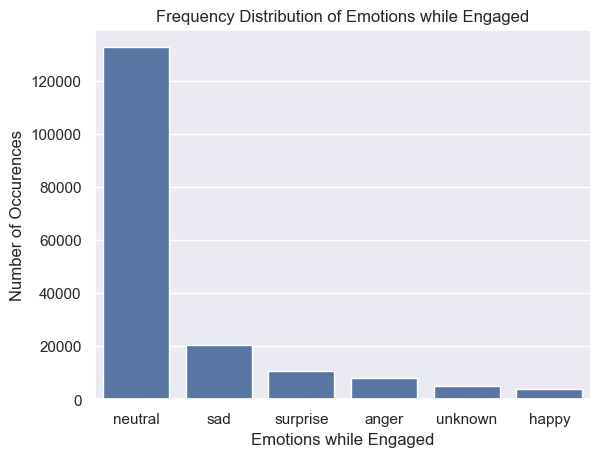

In [59]:
data = data.drop(data.loc[(data['engaged'] == "no")].index)

# Distribuição das emoções quando engaged
emotions_count = data['emotion'].value_counts()
print(emotions_count)
sns.set(style="darkgrid")
sns.barplot(x=emotions_count.index, y=emotions_count.values)
plt.title('Frequency Distribution of Emotions while Engaged')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Emotions while Engaged', fontsize=12)
plt.show()


## Número das diferentes emoções a cada 5 minutos

C:\Users\danie\AppData\Local\Temp\ipykernel_4856\282338027.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['time_5min'] = data['time'].dt.floor('5T')


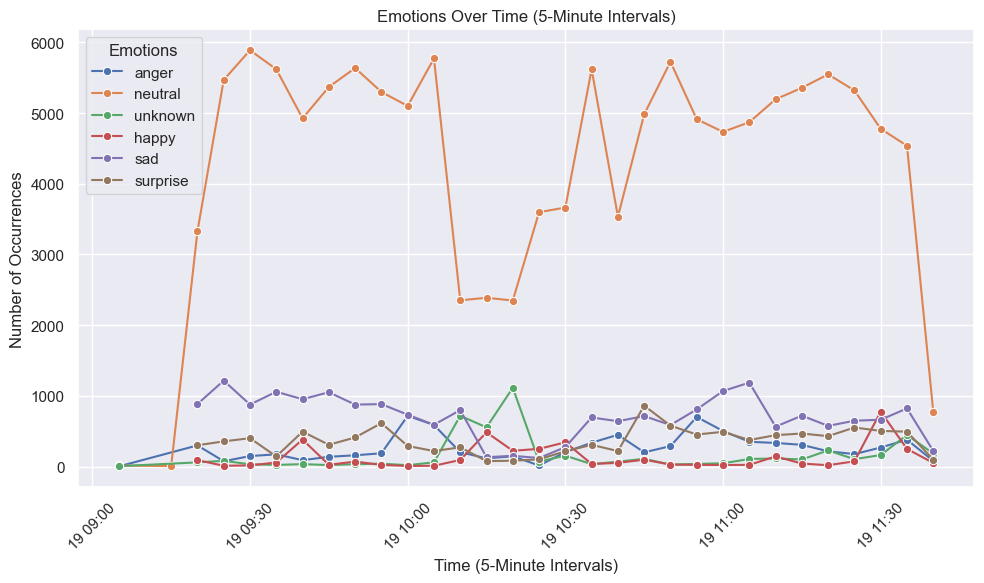

In [60]:
import matplotlib.dates as mdates


# Numero de ocorrências de emoções a cada 5 minutos

data['time_5min'] = data['time'].dt.floor('5T')

# Agrupar por intervalo de tempo de 5 minutos e emoção
emotions_count_5min = data.groupby([data['time_5min'], data['emotion']]).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.lineplot(data=emotions_count_5min, x='time_5min', y='counts', hue='emotion', marker="o")
plt.title('Emotions Over Time (5-Minute Intervals)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Emotions')
plt.tight_layout()
plt.show()


## Número de emoções enquanto "engaged" a cada 5 minutos

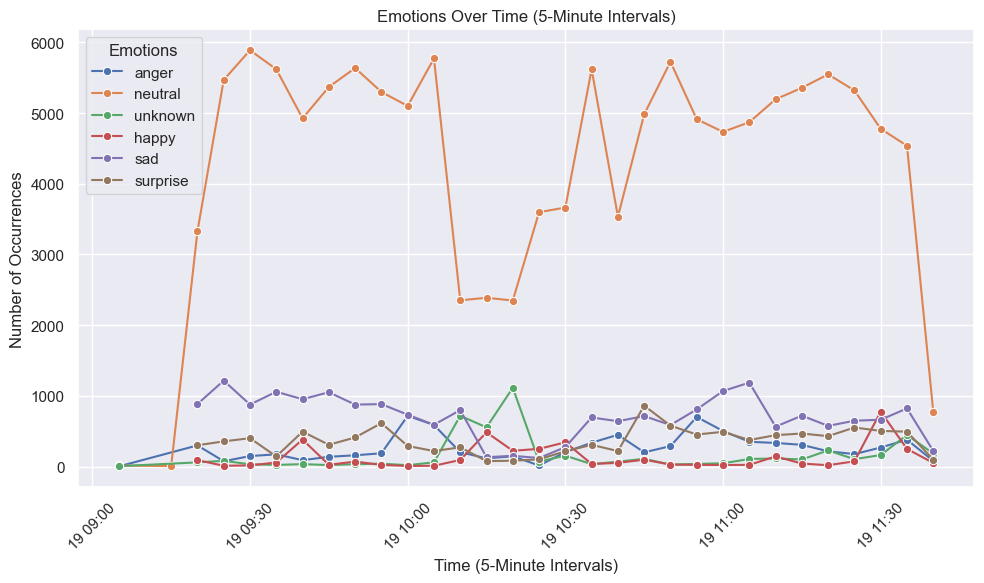

In [61]:
# Numero de ocorrências de emoções a cada 5 minutos


# Agrupar por intervalo de tempo de 5 minutos e emoção
emotions_count_5min = data.groupby([data['time_5min'], data['emotion']]).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.lineplot(data=emotions_count_5min, x='time_5min', y='counts', hue='emotion', marker="o")
plt.title('Emotions Over Time (5-Minute Intervals)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Emotions')
plt.tight_layout()
plt.show()

## Número de "engaged" a cada 5 minutos

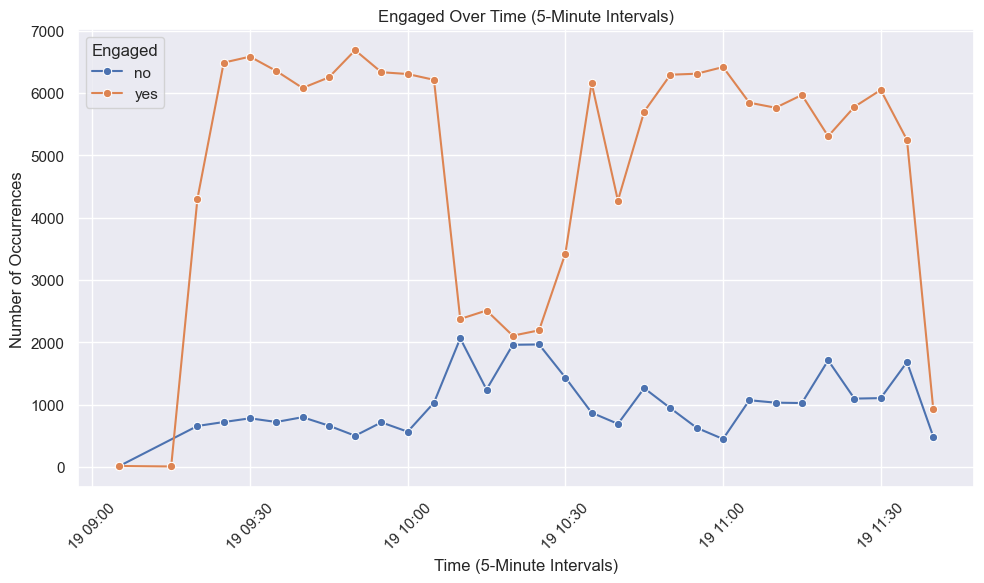

In [62]:
# Engaged a cada 5 minutos


# Agrupar por intervalo de tempo de 5 minutos e emoção
engaged_count_5min = data.groupby([data['time_5min'], data['engaged']]).size().reset_index(name='counts')


plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_count_5min, x='time_5min', y='counts', hue='engaged', marker="o")
plt.title('Engaged Over Time (5-Minute Intervals)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Engaged')
plt.tight_layout()
plt.show()

In [63]:
import ast
import numpy

print(data['source'].value_counts())

def calcular_centro(coord_str):
    x1, y1, x2, y2 = ast.literal_eval(coord_str)
    centro_x = (x1 + x2) / 2
    centro_y = (y1 + y2) / 2
    return (centro_x, centro_y)

# Acrescentar uma feature que calcula o centro da cara
data['center'] = data['face_x1y1x2y2_coordinates'].apply(calcular_centro)

# Dividir entre as 2 cameras 
data1 = data[data['source'] == 1].copy()
data0 = data[data['source'] == 0].copy()

data.head()


source
0    129584
1     50494
Name: count, dtype: int64


,time,ad_displayed,emotion,engaged,face_x1y1x2y2_coordinates,gender,person,race,source,age,head_position,hour,time_5min,center
135476,2024-09-19 11:41:39.831000+00:00,young_male,neutral,yes,"(4, 362, 39, 418)",male,2023,east_asian,0,25,"(-12.326034, -21.743065, 2.8261013)",11,2024-09-19 11:40:00+00:00,"(21.5, 390.0)"
135477,2024-09-19 11:41:39.659000+00:00,young_male,neutral,yes,"(5, 361, 41, 418)",male,2023,east_asian,0,25,"(-12.326034, -21.743065, 2.8261013)",11,2024-09-19 11:40:00+00:00,"(23.0, 389.5)"
135478,2024-09-19 11:41:39.493000+00:00,young_male,neutral,yes,"(6, 358, 44, 419)",male,2023,east_asian,0,25,"(-19.596684, -7.042565, -16.348164)",11,2024-09-19 11:40:00+00:00,"(25.0, 388.5)"
135479,2024-09-19 11:41:38.650000+00:00,young_male,sad,yes,"(143, 354, 188, 411)",male,2021,middle_eastern,0,25,"(-22.284231, -8.075434, -10.575067)",11,2024-09-19 11:40:00+00:00,"(165.5, 382.5)"
135480,2024-09-19 11:41:38.474000+00:00,young_male,sad,yes,"(145, 354, 189, 411)",male,2021,middle_eastern,0,25,"(-22.284231, -8.075434, -10.575067)",11,2024-09-19 11:40:00+00:00,"(167.0, 382.5)"


## K-Means 

#### Camera 1 - de cima

In [64]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 



from sklearn.cluster import KMeans

coordinates = pd.DataFrame(data1['center'].tolist(), columns=['x','y'])

kmeans = KMeans(12,random_state=24)
data1['cluster'] = kmeans.fit_predict(coordinates)


centroids = kmeans.cluster_centers_

# Lista as coordenadas dos centroids
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")





Cluster 0: (280.31, 411.44)
Cluster 1: (1132.28, 893.03)
Cluster 2: (1623.63, 801.45)
Cluster 3: (688.85, 834.97)
Cluster 4: (417.86, 786.05)
Cluster 5: (939.91, 796.44)
Cluster 6: (1164.06, 762.07)
Cluster 7: (657.34, 403.77)
Cluster 8: (1392.99, 794.50)
Cluster 9: (1677.10, 435.28)
Cluster 10: (251.70, 861.23)
Cluster 11: (1817.51, 783.03)


#### Mostrar Clusters no Mapa

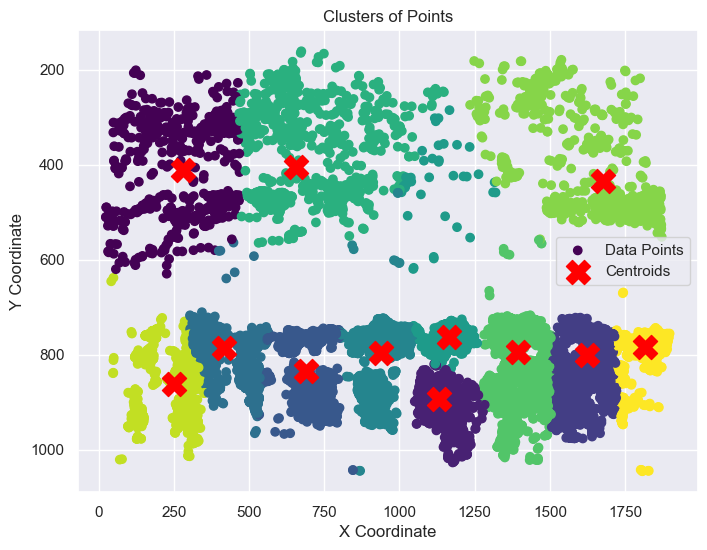

In [65]:
# Ver os clusters
plt.figure(figsize=(8, 6))
plt.scatter(coordinates['x'], coordinates['y'], c=data1['cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Clusters of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
#plt.gca().invert_xaxis()  # Inverter o eixo x
plt.gca().invert_yaxis()  # Inverter o eixo y
plt.show()

In [66]:
# Remover todos os dados dos cluster que não interessam (os de baixo)
data1 = data1.drop(data1.loc[(data1['cluster']==0) | (data1['cluster']==7) | (data1['cluster']==9)].index)

In [67]:
# Camara de cima 

'''

Cluster 10: 969
Cluster 4: 1021
Cluster 3: 993
Cluster 5: 988
Cluster 1: 979
Cluster 6: 943
Cluster 8: 990
Cluster 2: 1003
Cluster 11: 1039

'''

'\n\nCluster 10: 969\nCluster 4: 1021\nCluster 3: 993\nCluster 5: 988\nCluster 1: 979\nCluster 6: 943\nCluster 8: 990\nCluster 2: 1003\nCluster 11: 1039\n\n'

#### Camera 0 - de baixo

In [68]:
coordinates = pd.DataFrame(data0['center'].tolist(), columns=['x','y'])

kmeans = KMeans(8, random_state=24)
data0['cluster'] = kmeans.fit_predict(coordinates)

centroids = kmeans.cluster_centers_

# Lista as coordenadas dos centroids
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")


Cluster 0: (913.04, 595.84)
Cluster 1: (1598.89, 515.62)
Cluster 2: (463.58, 614.27)
Cluster 3: (1303.25, 611.33)
Cluster 4: (722.85, 617.26)
Cluster 5: (866.44, 87.81)
Cluster 6: (213.10, 653.91)
Cluster 7: (1085.33, 570.51)


#### Mostrar Clusters no Mapa

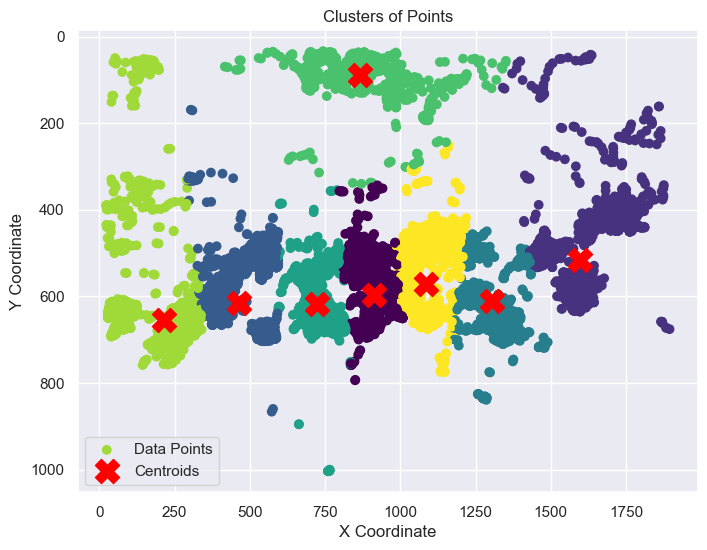

In [69]:
# Ver os clusters
plt.figure(figsize=(8, 6))
plt.scatter(coordinates['x'], coordinates['y'], c=data0['cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Clusters of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y
plt.show()

In [70]:
# Remover todos os dados do cluster 5 que não interessam
data0 = data0.drop(data0.loc[(data0['cluster']==5)].index)


In [71]:
# Camara de Baixo

'''

Cluster 6: 260
Cluster 2: 246
Cluster 4: 272
Cluster 0: 201
Cluster 7: 249
Cluster 3: 125
Cluster 1: 189

'''

'\n\nCluster 6: 260\nCluster 2: 246\nCluster 4: 272\nCluster 0: 201\nCluster 7: 249\nCluster 3: 125\nCluster 1: 189\n\n'

## Unir os 2 datasets das duas câmaras

In [72]:
'''

Baixo    = Cima
260 (6)  = 969  (10)
246 (2)  = 993  (3)
272 (4)
201 (0)  = 979  (1)
249 (7)  = 1003 (2)
125 (3)  = 1039 (11)
189 (1) 
           1021 (4)
           998  (5)
           990  (8)
           943  (6)

'''

'\n\nBaixo    = Cima\n260 (6)  = 969  (10)\n246 (2)  = 993  (3)\n272 (4)\n201 (0)  = 979  (1)\n249 (7)  = 1003 (2)\n125 (3)  = 1039 (11)\n189 (1) \n           1021 (4)\n           998  (5)\n           990  (8)\n           943  (6)\n\n'

In [73]:
# Substituição câmera de baixo
data0['cluster'] = data0['cluster'].replace(6,260)
data0['cluster'] = data0['cluster'].replace(2,246)
data0['cluster'] = data0['cluster'].replace(4,272)
data0['cluster'] = data0['cluster'].replace(0,201)
data0['cluster'] = data0['cluster'].replace(7,249)
data0['cluster'] = data0['cluster'].replace(3,125)
data0['cluster'] = data0['cluster'].replace(1,659)

# Subsituição câmara de cima
data1['cluster'] = data1['cluster'].replace(10,260)
data1['cluster'] = data1['cluster'].replace(3,246)
data1['cluster'] = data1['cluster'].replace(4,1021)
data1['cluster'] = data1['cluster'].replace(1,201)
data1['cluster'] = data1['cluster'].replace(6,943)
data1['cluster'] = data1['cluster'].replace(8,990)
data1['cluster'] = data1['cluster'].replace(2,249)
data1['cluster'] = data1['cluster'].replace(11,125)
data1['cluster'] = data1['cluster'].replace(5,998)

data_final = pd.concat([data0,data1], ignore_index=True)

# _______________________________________________________________

## Distribuição de Engagement de cada pessoa


Text(0, 0.5, 'Contagem de Engagement')

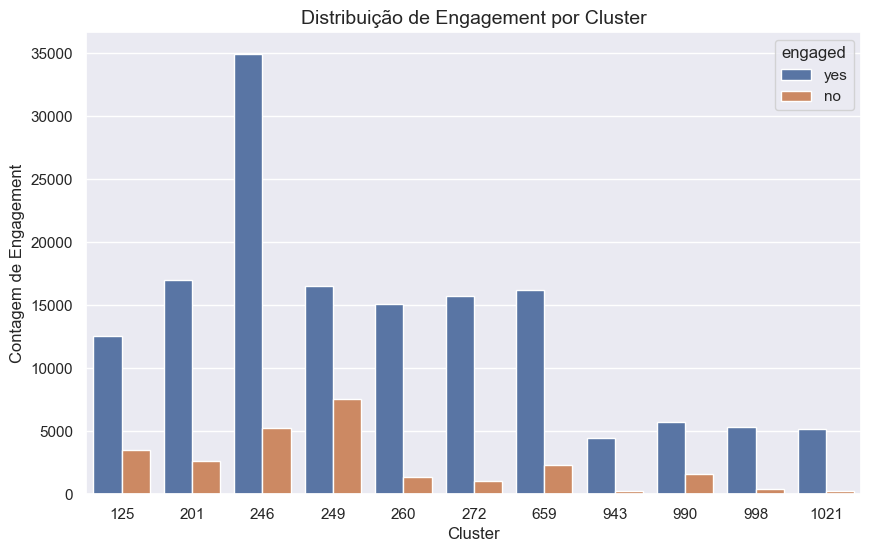

In [79]:
from IPython.display import display

group_cluster_engagment = data_final.groupby('cluster')['engaged'].value_counts().reset_index(name='contagem')

#print(group_cluster_engagment)
#display(group_cluster_engagment)


#print(group_cluster_engagment)
#display(group_cluster_emotion)

plt.figure(figsize=(10,6))

# Criar o gráfico de barras
sns.barplot(x='cluster', y='contagem', hue='engaged', data=group_cluster_engagment)

# Definir os títulos e rótulos
plt.title('Distribuição de Engagement por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem de Engagement', fontsize=12)

## Distribuição de Emotions de cada pessoa

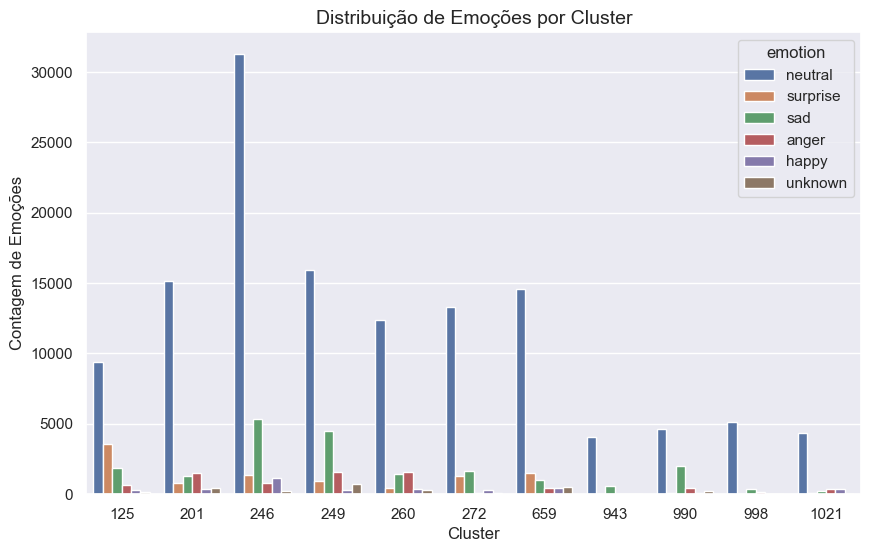

In [75]:
group_cluster_emotion = data_final.groupby('cluster')['emotion'].value_counts().reset_index(name='contagem')

#print(group_cluster_engagment)
#display(group_cluster_emotion)

plt.figure(figsize=(10,6))

# Criar o gráfico de barras
sns.barplot(x='cluster', y='contagem', hue='emotion', data=group_cluster_emotion)

# Definir os títulos e rótulos
plt.title('Distribuição de Emoções por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem de Emoções', fontsize=12)

# Mostrar o gráfico
plt.show()

## Engagement de cada pessoa a cada 5 minutos

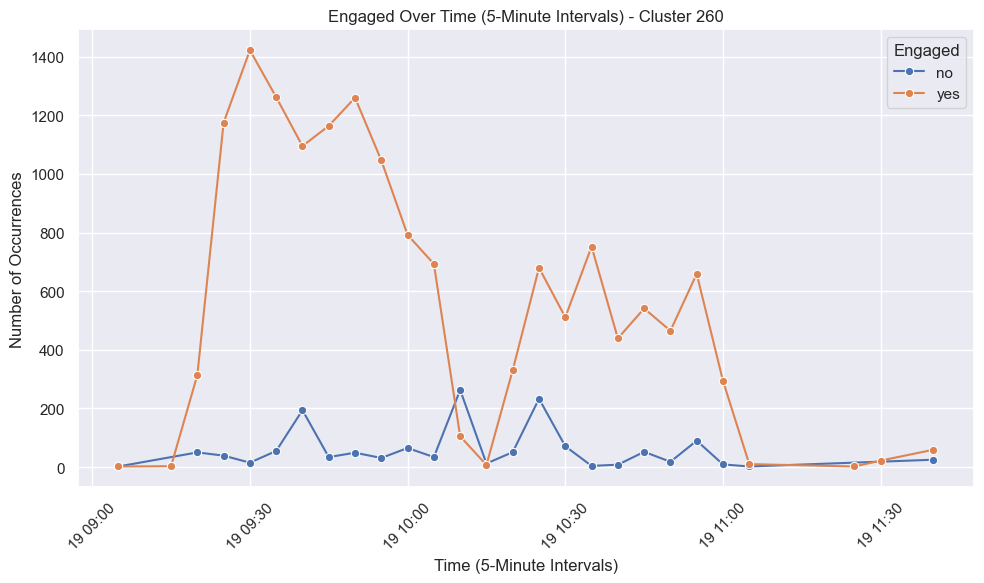

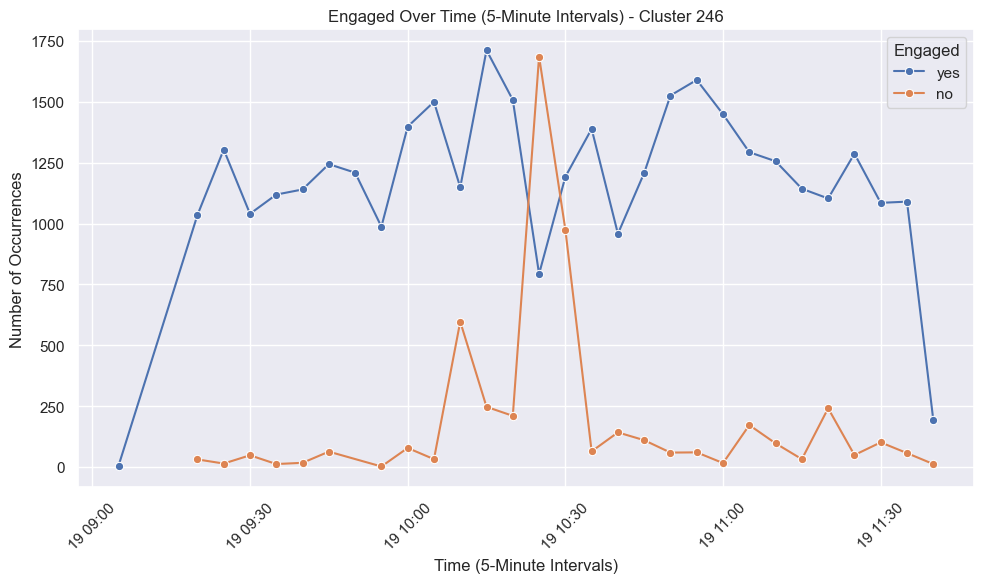

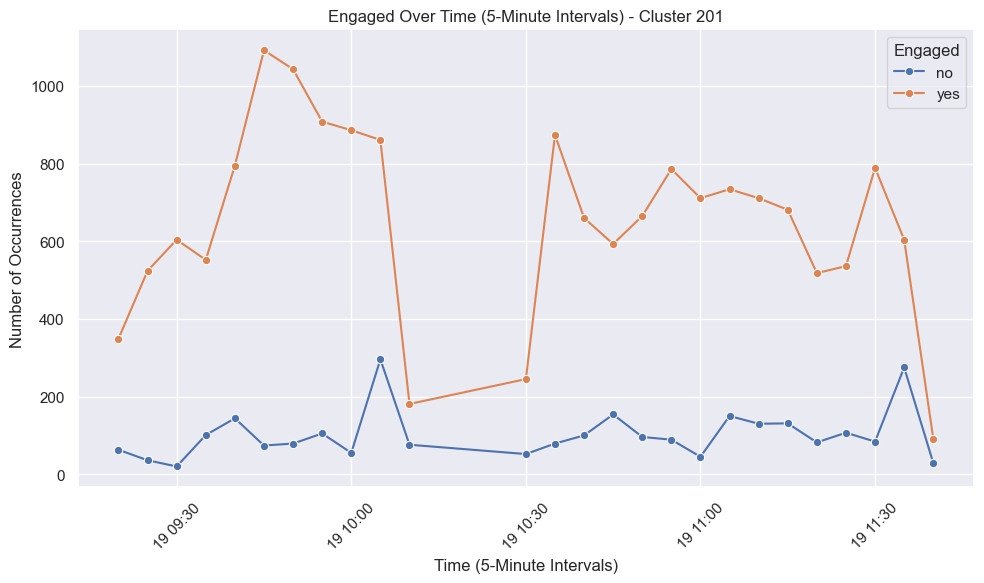

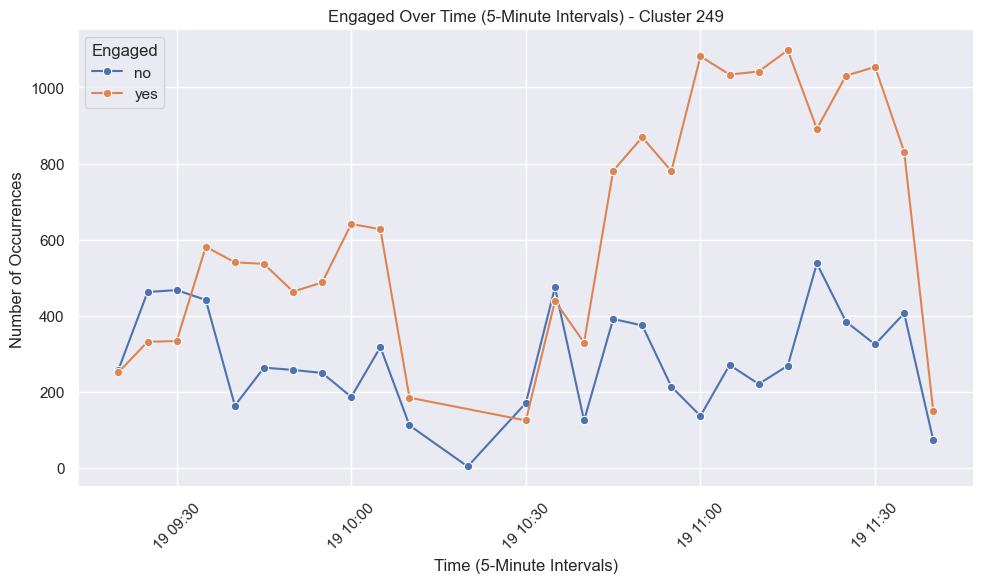

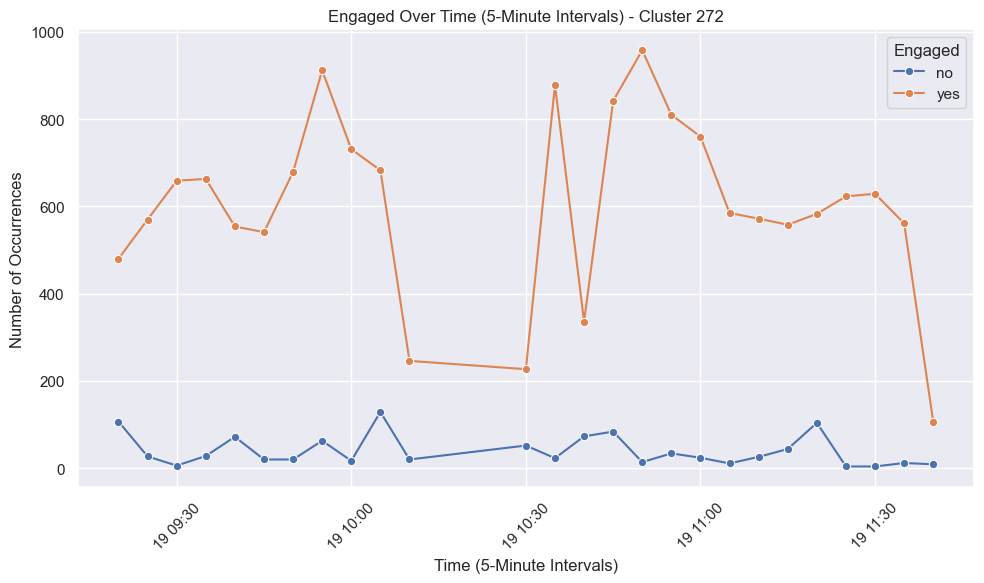

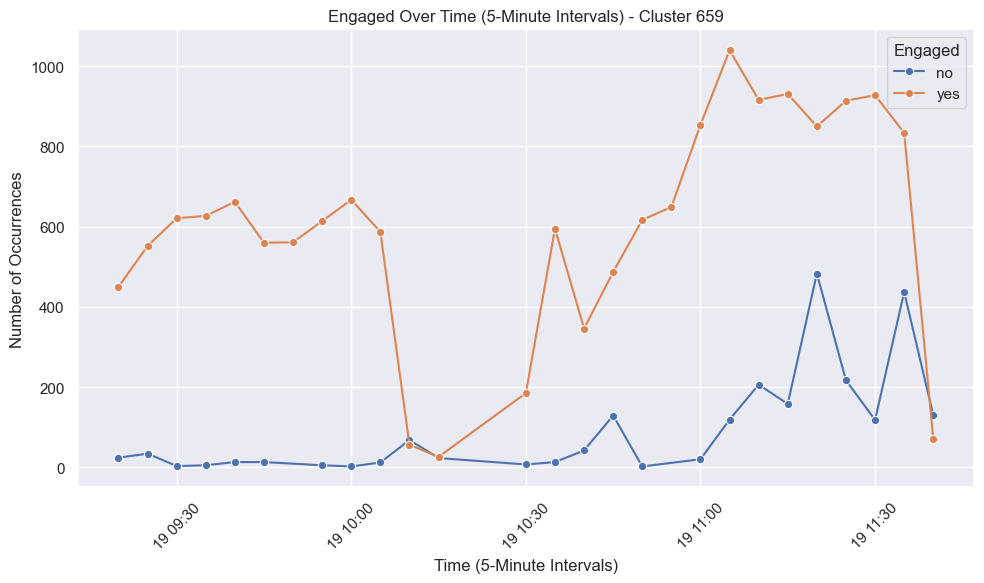

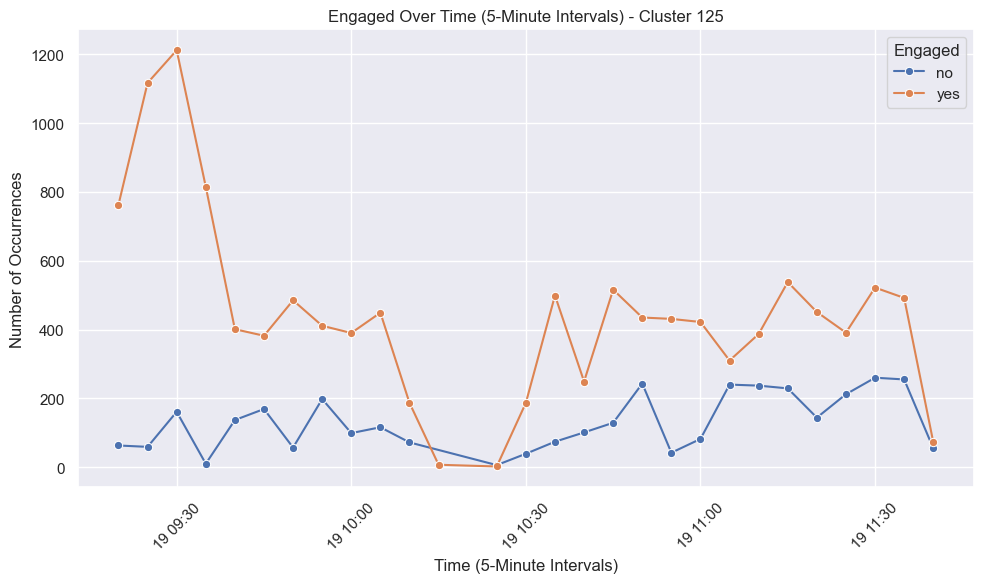

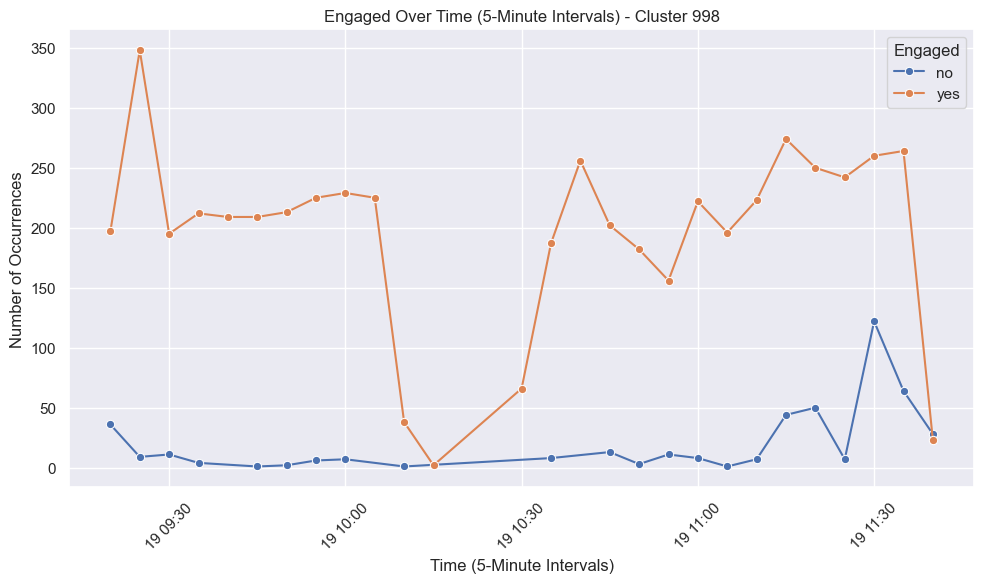

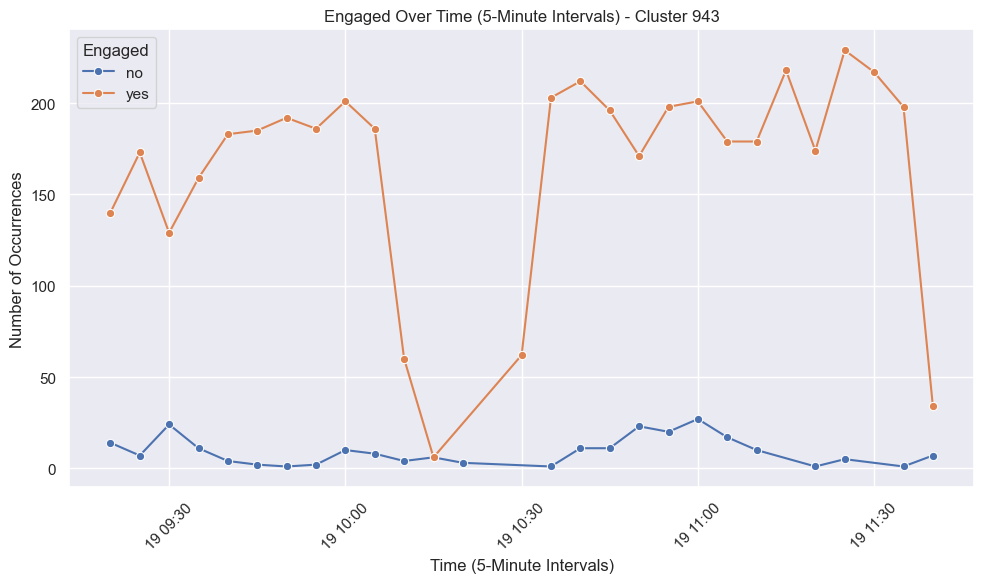

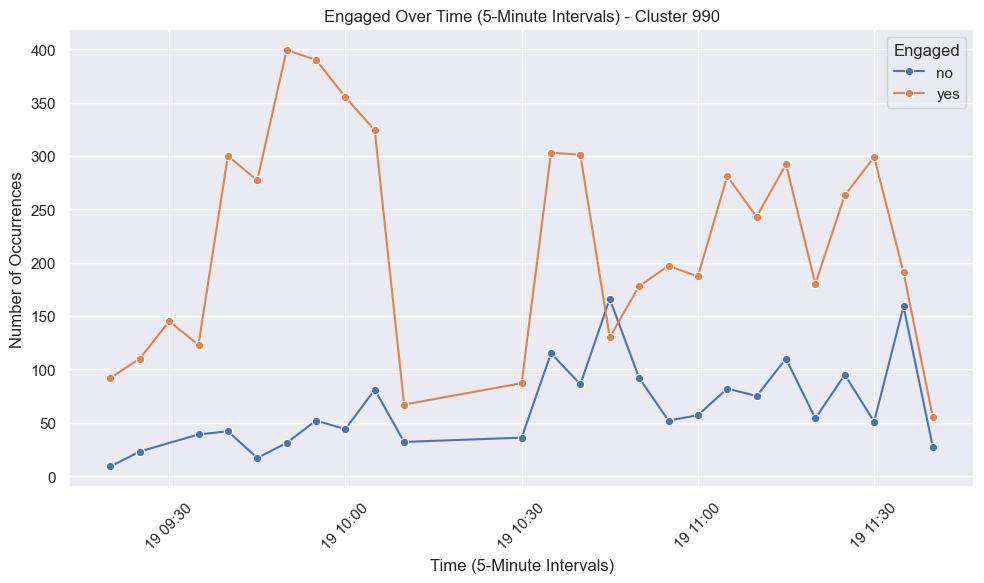

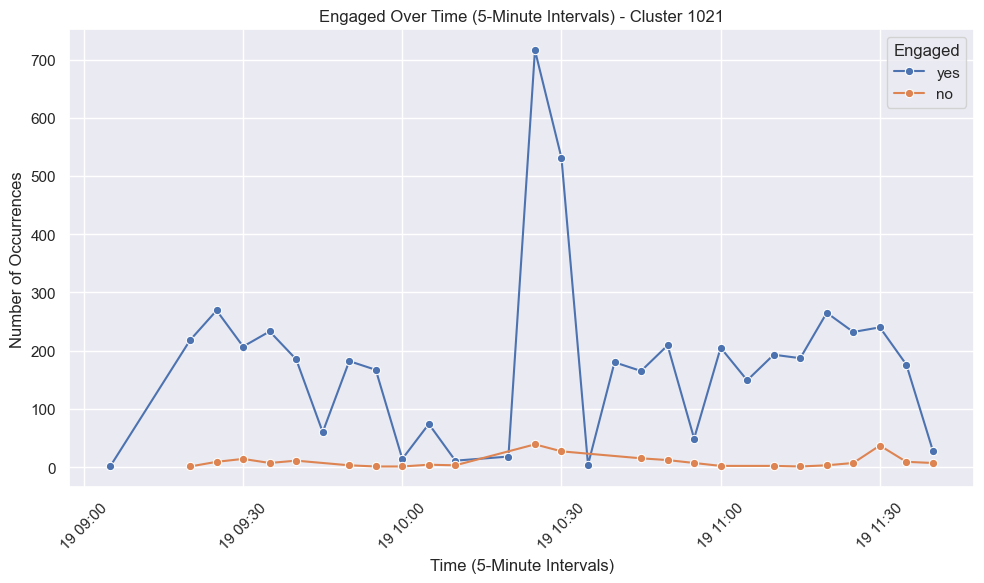

In [76]:
clusters = data_final['cluster'].unique()

for i in clusters:
    # Dataframe com dados do cluster especifico
    data_cluster_i = data_final[data_final['cluster'] == i]
    group_cluster_time =  data_cluster_i.groupby([data_cluster_i['time_5min'], data_cluster_i['engaged']]).size().reset_index(name='counts')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=group_cluster_time, x='time_5min', y='counts', hue='engaged', marker="o")
    plt.title(f'Engaged Over Time (5-Minute Intervals) - Cluster {i}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Engaged')
    plt.tight_layout()
    plt.show()


## Emotions de cada pessoa a cada 15 minutos

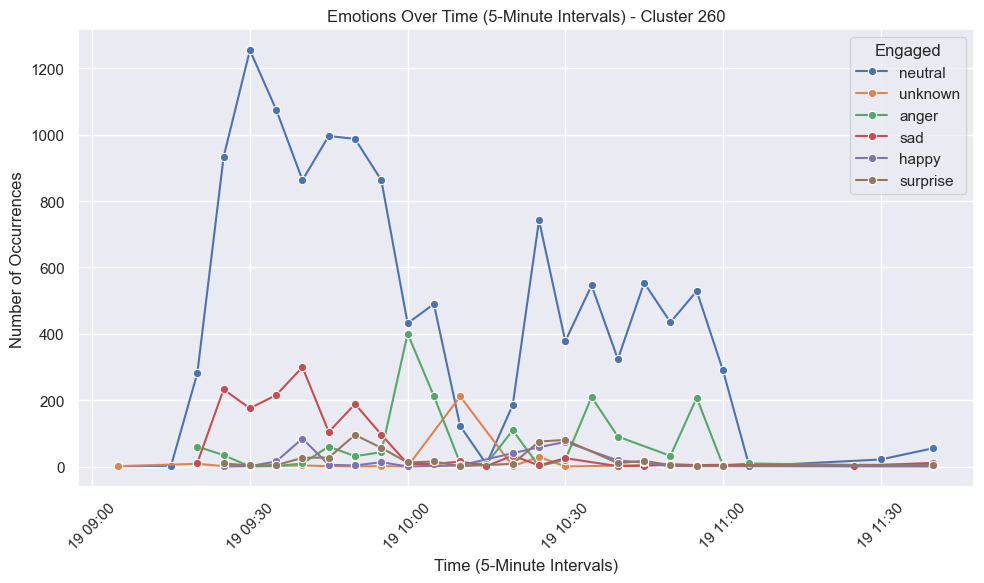

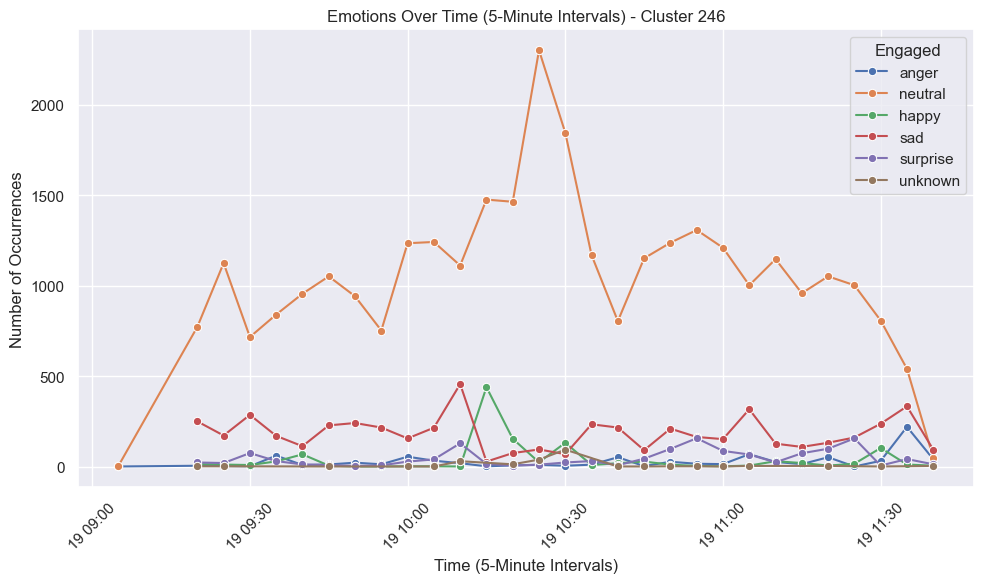

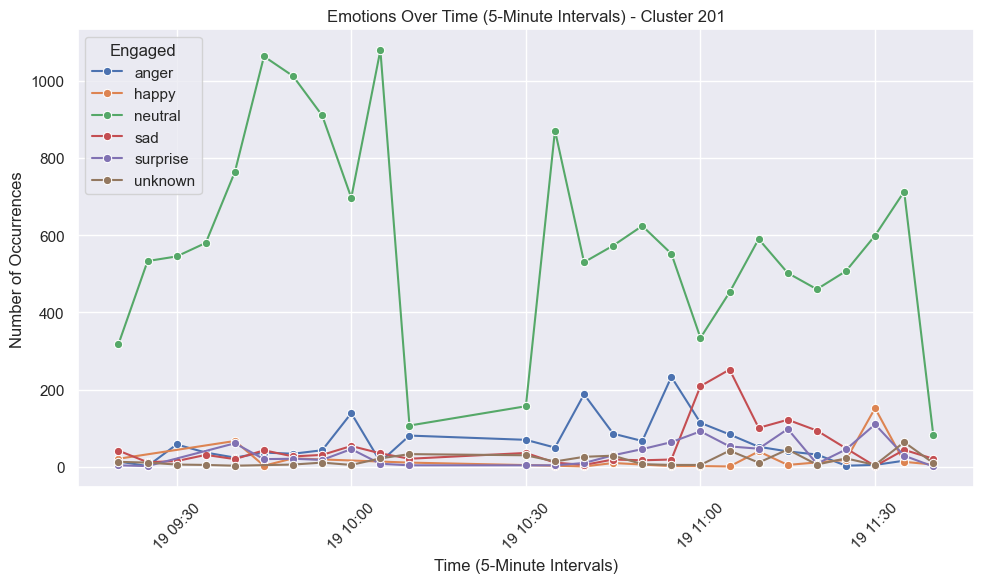

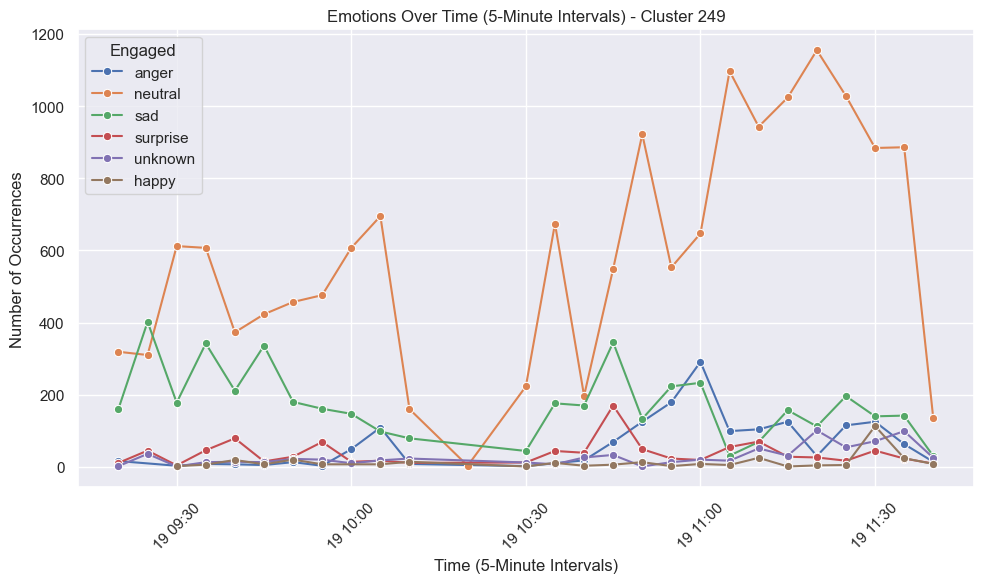

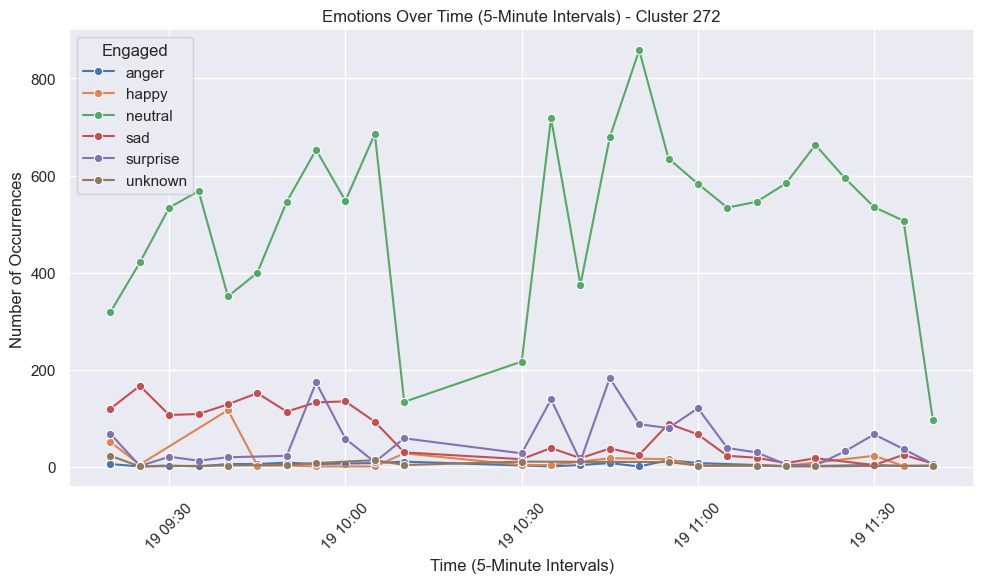

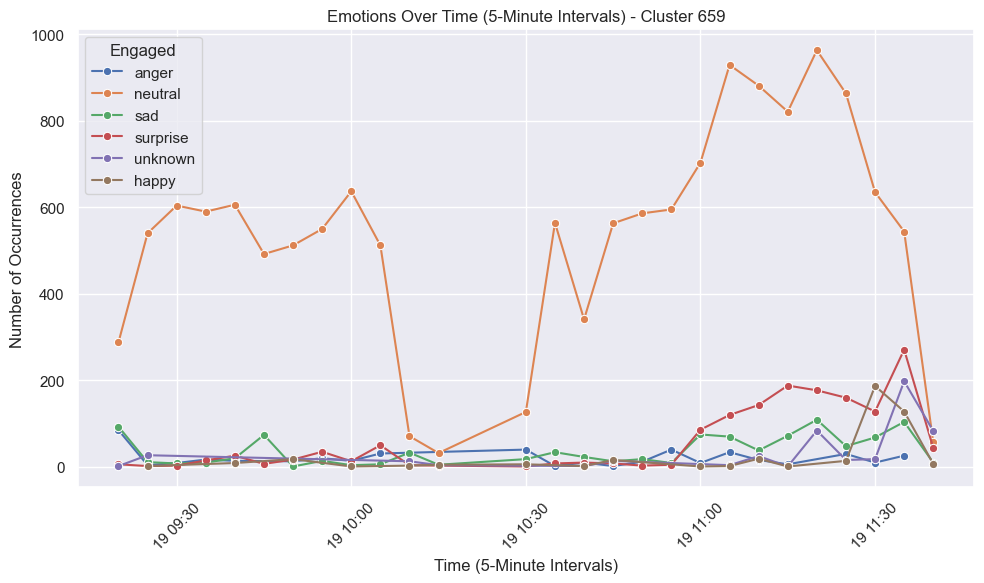

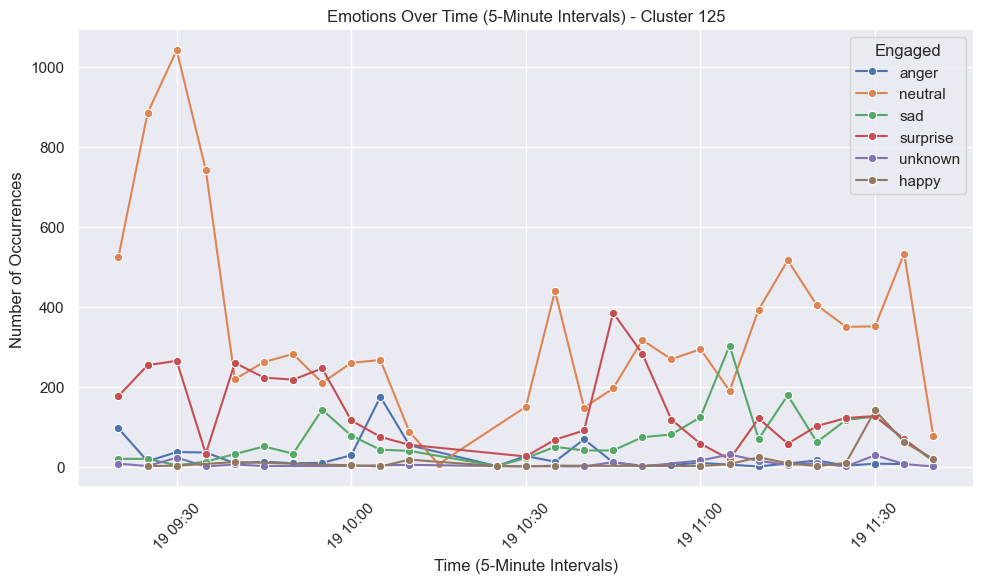

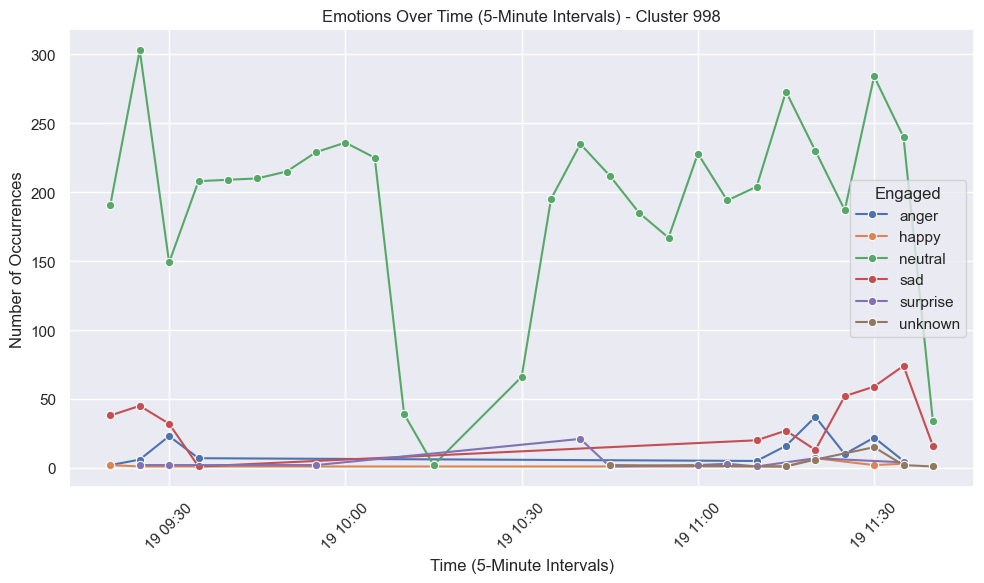

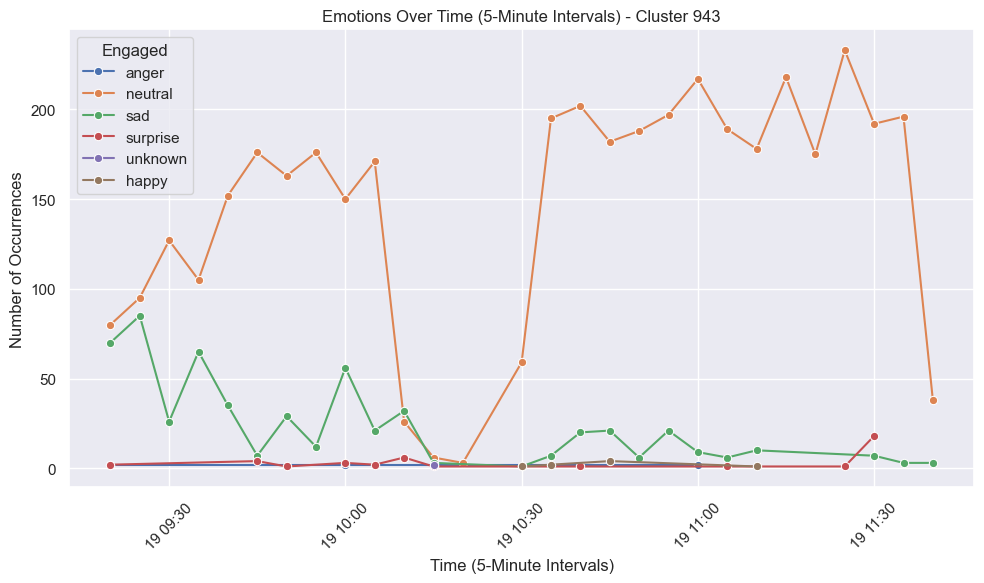

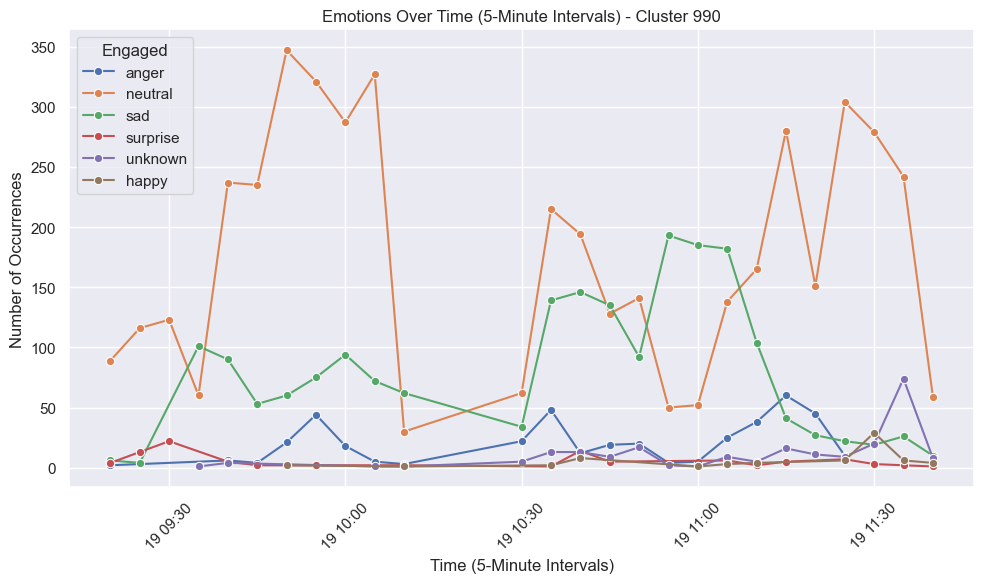

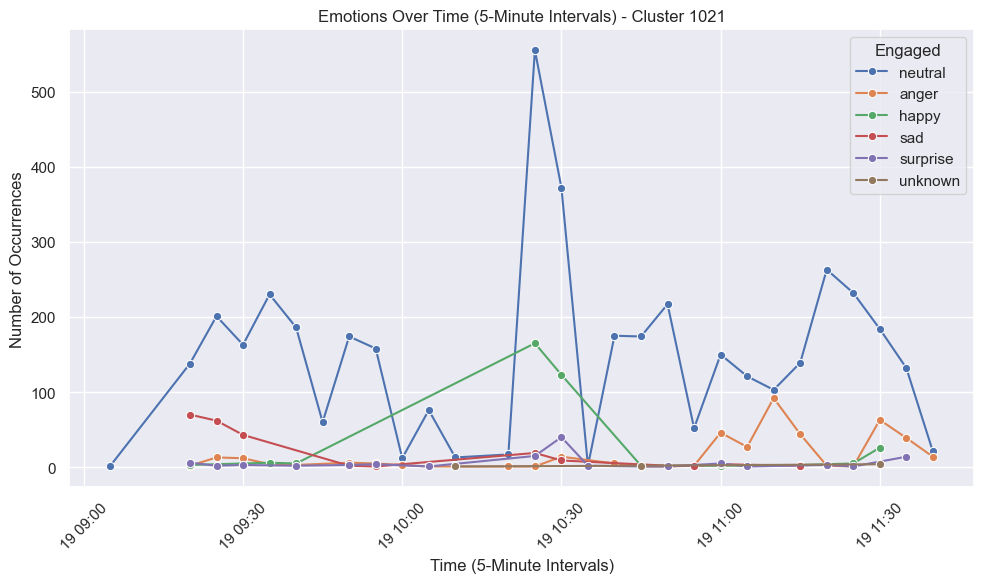

In [77]:
for i in clusters:
    # Dataframe com dados do cluster especifico
    data_cluster_i = data_final[data_final['cluster'] == i]
    group_cluster_time =  data_cluster_i.groupby([data_cluster_i['time_5min'], data_cluster_i['emotion']]).size().reset_index(name='counts')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=group_cluster_time, x='time_5min', y='counts', hue='emotion', marker="o")
    plt.title(f'Emotions Over Time (5-Minute Intervals) - Cluster {i}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Engaged')
    plt.tight_layout()
    plt.show()